   spending_time  deep_scroling   add_card  view_page  purchase
0      37.454012      18.513293  26.170568   6.727030         0
1      95.071431      54.190095  24.697880   7.966814         1
2      73.199394      87.294584  90.625458   2.504679         1
3      59.865848      73.222489  24.954620   6.248741         1
4      15.601864      80.656115  27.194973   5.717460         1
model accuracy: 95.50%


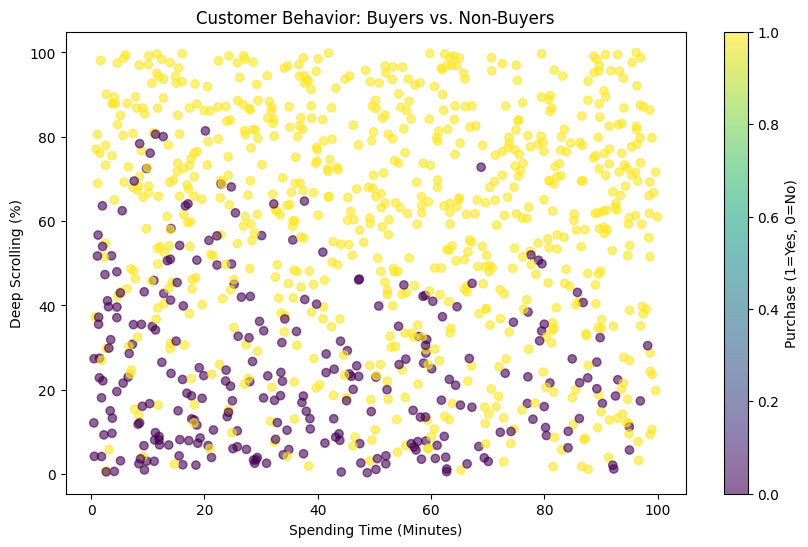

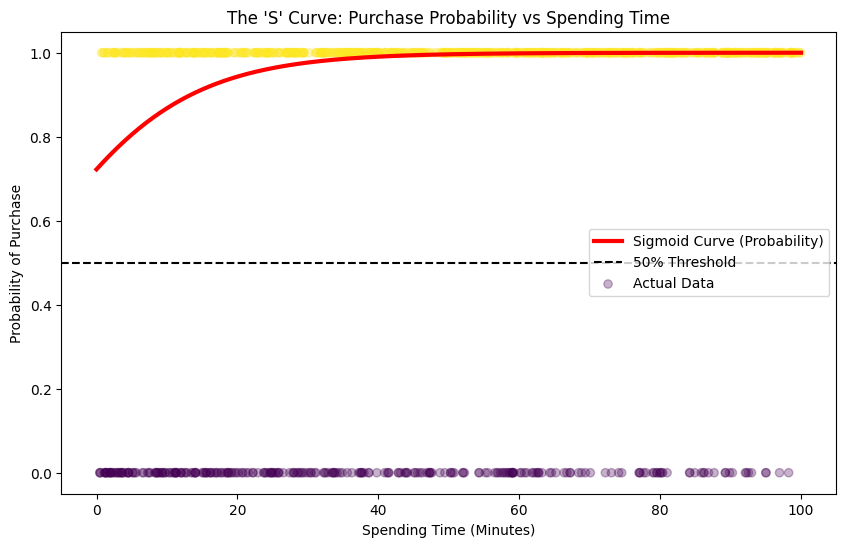

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt




#create manual dataset using Synthetic Data Generation
n = 1000

np.random.seed(42)

spending_time = np.random.uniform(0,100,size =n)
deep_scroling = np.random.uniform(0,100,size=n)
add_card = np.random.uniform(0,100,size=n)
view_page = np.random.uniform(0,10,size=n)

#generate the terget variable based on the condion 

score = (spending_time * 0.5 + deep_scroling + add_card +view_page + np.random.normal(0,10,size=n))
#if customer buy the product 1 else 0
purchase = (score > 100).astype(int)

#create a Dataframe 

df = pd.DataFrame({'spending_time': spending_time, 'deep_scroling': deep_scroling, 'add_card': add_card, 'view_page': view_page,
                   'purchase': purchase})
print(df.head())

#split the data into feature and target value 

x = df.drop('purchase', axis=1)

y = df['purchase']


#split the data into training and testing set 

x_train, x_test, y_train, y_test =tts(x,y, test_size=0.2, random_state=42)

#create the logistic regression model 

model = LR()
model.fit(x_train, y_train)

#make predictions
accuracy = accuracy_score (y_test, model.predict(x_test))*100
print(f"model accuracy: {accuracy:.2f}%")




# 1. Create a figure (the canvas)
plt.figure(figsize=(10, 6))


plt.scatter(df['spending_time'], df['deep_scroling'], c=df['purchase'], cmap='viridis', alpha=0.6)

# 3. Add labels so we know what we are looking at
plt.title("Customer Behavior: Buyers vs. Non-Buyers")
plt.xlabel("Spending Time (Minutes)")
plt.ylabel("Deep Scrolling (%)")
plt.colorbar(label='Purchase (1=Yes, 0=No)')

# 4. Show the plot
plt.show()






# 1. We create a range of 'spending_time' from 0 to 100 for a smooth line
x_range = np.linspace(0, 100, 300).reshape(-1, 1)

# 2. To predict, the model needs all 4 features. 
# We'll use the average values for the other 3 features so we can see the 'Time' effect.
avg_scrolling = df['deep_scroling'].mean()
avg_add_card = df['add_card'].mean()
avg_view_page = df['view_page'].mean()

# Combine them into a dummy dataset for prediction
dummy_data = np.column_stack([
    x_range, 
    np.full_like(x_range, avg_scrolling),
    np.full_like(x_range, avg_add_card),
    np.full_like(x_range, avg_view_page)
])


# [:, 1] takes the probability of being a '1' (Buyer)

dummy_df = pd.DataFrame(dummy_data, columns=x.columns)

# 4. Use the DataFrame to predict (this removes the Warning)
probabilities = model.predict_proba(dummy_df)[:, 1]

# 4. Plotting the Curve
plt.figure(figsize=(10, 6))
plt.plot(x_range, probabilities, color='red', linewidth=3, label='Sigmoid Curve (Probability)')
plt.axhline(0.5, color='black', linestyle='--', label='50% Threshold')

# Overlay the actual data points from your dataset
plt.scatter(df['spending_time'], df['purchase'], c=df['purchase'], cmap='viridis', alpha=0.3, label='Actual Data')

plt.title("The 'S' Curve: Purchase Probability vs Spending Time")
plt.xlabel("Spending Time (Minutes)")
plt.ylabel("Probability of Purchase")
plt.legend()
plt.show()





